In [3]:
#1.a(第一行输出)
import json
file_path = "C:\\Users\\flipp\\Desktop\\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = {node[0]: node[1] for node in data['nodes']}
edges = data['edges']

adjacency_dict = {node: {} for node in nodes}
for edge in edges:
    user1, user2, weight = edge
    adjacency_dict[user1][user2] = weight
    adjacency_dict[user2][user1] = weight  

print(adjacency_dict)
print()
#1.b（第三行开始）
direct_friends = {user: list(friends.keys()) for user, friends in adjacency_dict.items()}
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")


{'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}, 'tyn1998': {'a

In [3]:
#2.a
import pandas as pd
import json
file_path = "C:\\Users\\flipp\\Desktop\\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data['nodes']
edges = data['edges']

nodes_df = pd.DataFrame(nodes, columns=['user', 'influence_score'])
edges_df = pd.DataFrame(edges, columns=['user1', 'user2', 'weight'])

degree1 = edges_df.groupby('user1').size().reset_index(name='degree')
degree2 = edges_df.groupby('user2').size().reset_index(name='degree')
degree = pd.concat([degree1.rename(columns={'user1': 'user'}), degree2.rename(columns={'user2': 'user'})])
degree = degree.groupby('user').sum().reset_index()

top_5_users = degree.sort_values(by='degree', ascending=False).head(5)

print(top_5_users)

#2.b
top_5_influential_users = nodes_df.sort_values(by='influence_score', ascending=False).head(5)

print(top_5_influential_users)

#2.c
combined_df = pd.merge(nodes_df, degree, on='user', how='left').fillna(0)
combined_df['composite_score'] = 0.5 * combined_df['influence_score'] + 0.5 * combined_df['degree']

top_5_composite_users = combined_df.sort_values(by='composite_score', ascending=False).head(5)

print(top_5_composite_users)




           user  degree
10    frank-zsy      30
19      tyn1998      30
15   pomelo-nwu      24
21      wj23027      23
7   andyhuang18      23
          user  influence_score
0  Yanyan-Wang            50.95
1    Aarebecca            23.82
2   pomelo-nwu            22.36
3      tyn1998            16.64
4    frank-zsy            15.80
          user  influence_score  degree  composite_score
0  Yanyan-Wang            50.95      14           32.475
3      tyn1998            16.64      30           23.320
2   pomelo-nwu            22.36      24           23.180
4    frank-zsy            15.80      30           22.900
1    Aarebecca            23.82      11           17.410


In [5]:
#3.a
import pandas as pd
import json
file_path = "C:\\Users\\flipp\\Desktop\\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data['nodes']
edges = data['edges']

nodes_df = pd.DataFrame(nodes, columns=['user', 'influence_score'])
edges_df = pd.DataFrame(edges, columns=['user1', 'user2', 'weight'])

target_user = 'Yanyan-Wang'
friends_of_target = set(edges_df[(edges_df['user1'] == target_user) | (edges_df['user2'] == target_user)]['user1'].tolist() + 
                        edges_df[(edges_df['user1'] == target_user) | (edges_df['user2'] == target_user)]['user2'].tolist())
friends_of_target.discard(target_user)  

friends_of_friends = set()
for friend in friends_of_target:
    friends_of_friend = set(edges_df[(edges_df['user1'] == friend) | (edges_df['user2'] == friend)]['user1'].tolist() + 
                            edges_df[(edges_df['user1'] == friend) | (edges_df['user2'] == friend)]['user2'].tolist())
    friends_of_friends.update(friends_of_friend)
friends_of_friends.discard(target_user) 
friends_of_friends -= friends_of_target  

common_friends_count = []
for user in friends_of_friends:
    common_friends = friends_of_target.intersection(set(edges_df[(edges_df['user1'] == user) | (edges_df['user2'] == user)]['user1'].tolist() + 
                                                        edges_df[(edges_df['user1'] == user) | (edges_df['user2'] == user)]['user2'].tolist()))
    common_friends_count.append((user, len(common_friends)))

common_friends_df = pd.DataFrame(common_friends_count, columns=['user', 'common_friends_count'])
top_recommendations = common_friends_df.sort_values(by='common_friends_count', ascending=False).head(5)

print("推荐的新朋友及其理由：")
for index, row in top_recommendations.iterrows():
    print(f"用户: {row['user']}, 共同朋友数量: {row['common_friends_count']}")

target_user = 'Yanyan-Wang'
connections = edges_df[(edges_df['user1'] == target_user) | (edges_df['user2'] == target_user)]

connection_strength = []
for _, row in connections.iterrows():
    if row['user1'] == target_user:
        connected_user = row['user2']
    else:
        connected_user = row['user1']
    connection_strength.append((connected_user, row['weight']))

connection_strength_df = pd.DataFrame(connection_strength, columns=['user', 'connection_strength'])
top_connections = connection_strength_df.sort_values(by='connection_strength', ascending=False).head(5)

print("与 Yanyan-Wang 连接强度最高的5个用户及其连接强度：")
for index, row in top_connections.iterrows():
    print(f"用户: {row['user']}, 连接强度: {row['connection_strength']}")


推荐的新朋友及其理由：
用户: birdflyi, 共同朋友数量: 6
用户: zhaosj975, 共同朋友数量: 6
用户: Zzzzzhuzhiwei, 共同朋友数量: 6
用户: longyanz, 共同朋友数量: 6
用户: zhicheng-ning, 共同朋友数量: 6
与 Yanyan-Wang 连接强度最高的5个用户及其连接强度：
用户: Aarebecca, 连接强度: 25.3
用户: pomelo-nwu, 连接强度: 25.09
用户: yangzy0603, 连接强度: 11.85
用户: tyn1998, 连接强度: 9.62
用户: yvonneyx, 连接强度: 7.39


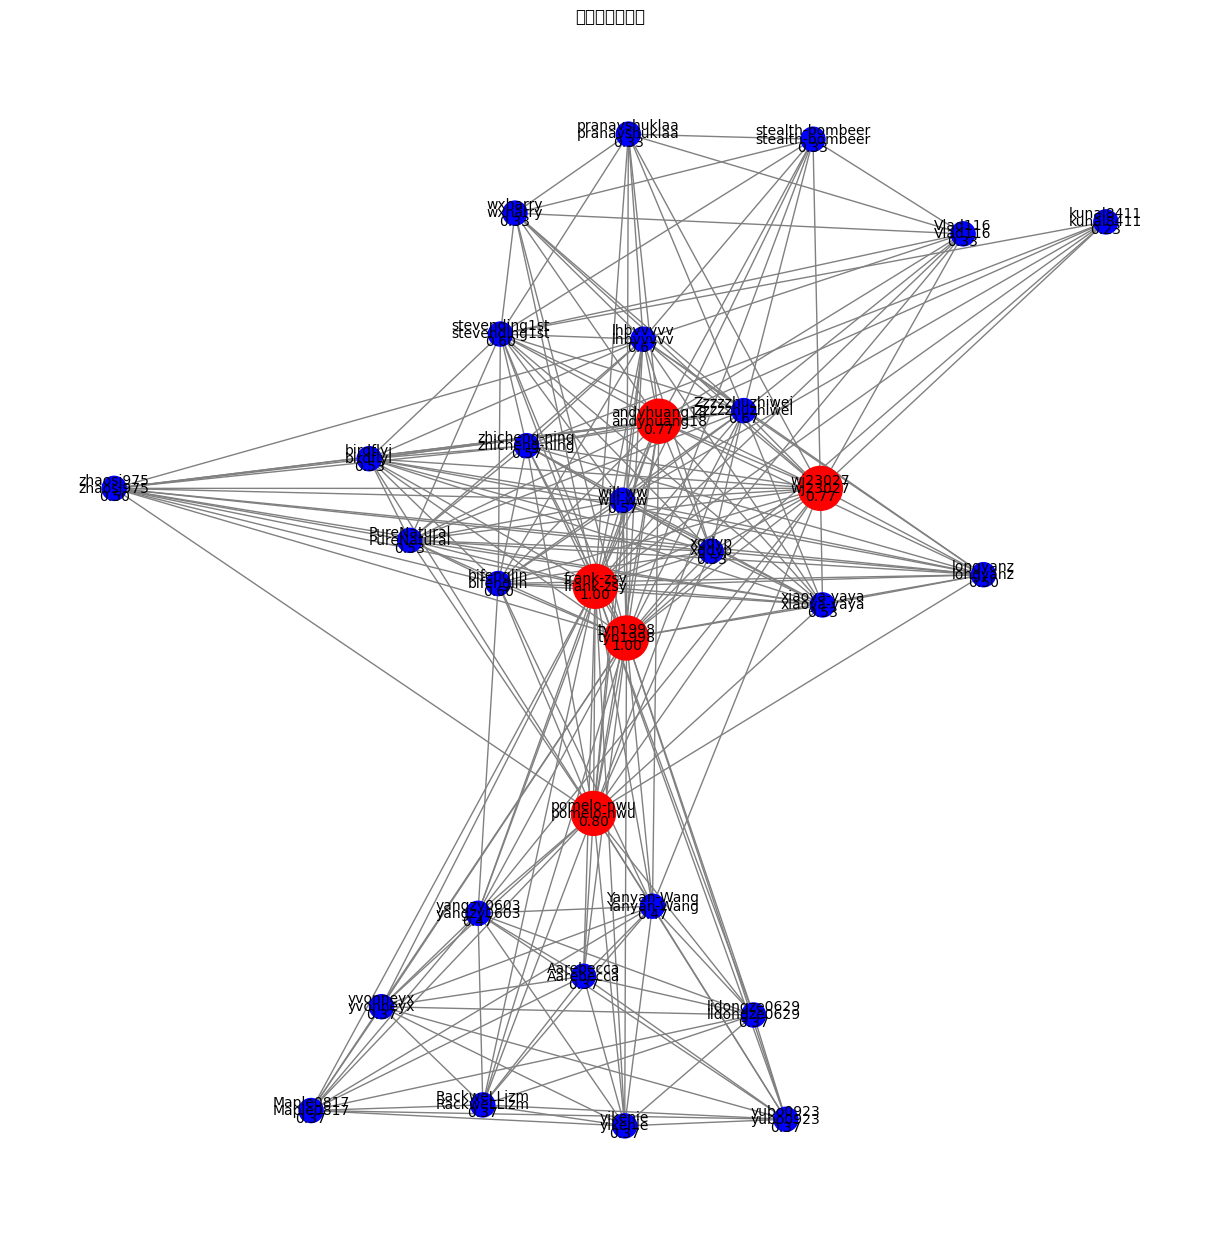

In [9]:
# 4.a
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt

file_path = "C:\\Users\\flipp\\Desktop\\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data['nodes']
edges = data['edges']

nodes_df = pd.DataFrame(nodes, columns=['user', 'influence_score'])
edges_df = pd.DataFrame(edges, columns=['user1', 'user2', 'weight'])

G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['weight'])

centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
top_5_key_users = [user for user, _ in sorted_centrality[:5]]

plt.figure(figsize=(12, 12))

node_colors = ['red' if node in top_5_key_users else 'blue' for node in G.nodes()]
node_sizes = [1000 if node in top_5_key_users else 300 for node in G.nodes()]

pos = nx.spring_layout(G, k=0.3)  
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray', font_size=10, font_color='black')

labels = {node: f"{node}\n{centrality[node]:.2f}" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

plt.title("用户关系网络图")
plt.show()

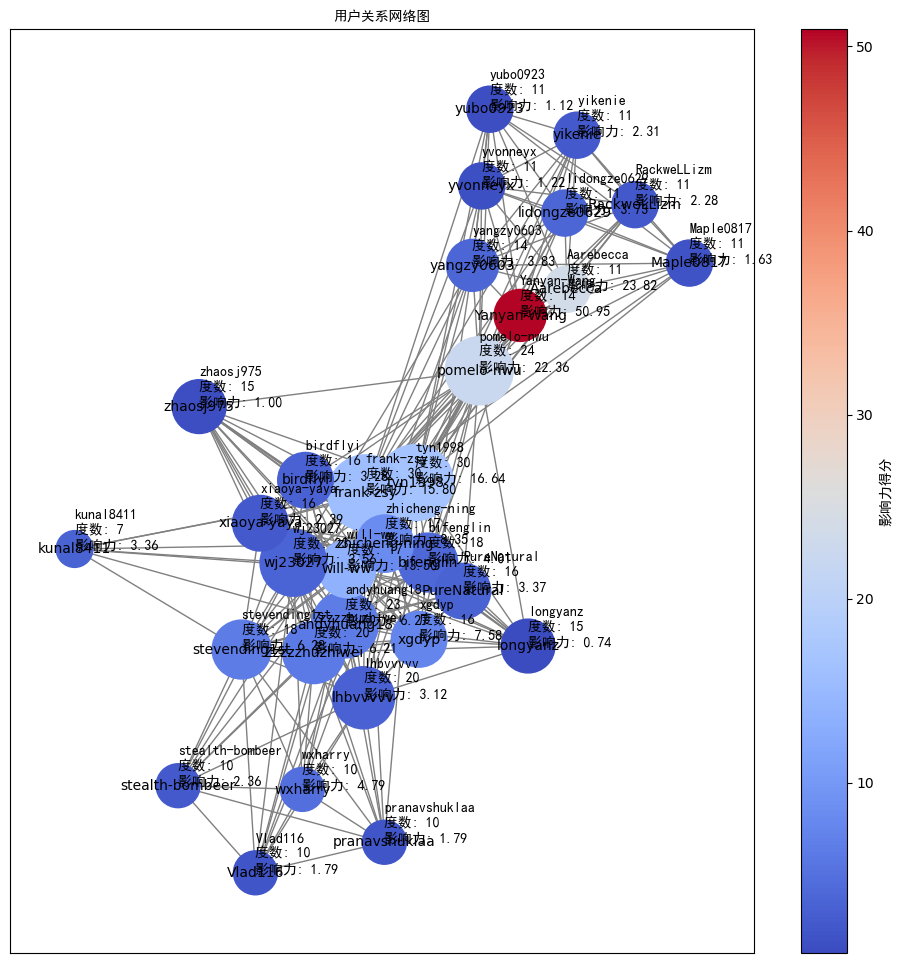

In [18]:
# 4.b
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.font_manager import FontProperties

file_path = "C:\\Users\\flipp\\Desktop\\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data['nodes']
edges = data['edges']

nodes_df = pd.DataFrame(nodes, columns=['user', 'influence_score'])
edges_df = pd.DataFrame(edges, columns=['user1', 'user2', 'weight'])

G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['weight'])

degrees = dict(G.degree())

influence_scores = {node['user']: node['influence_score'] for node in nodes_df.to_dict(orient='records')}

fig, ax = plt.subplots(figsize=(12, 12))

node_colors = [influence_scores[node] for node in G.nodes()]
node_sizes = [degrees[node] * 100 for node in G.nodes()] 

font = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=10)

pos = nx.spring_layout(G, k=0.3) 
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray', cmap='coolwarm', font_size=10, font_color='black', ax=ax)

norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))
sc = ScalarMappable(norm=norm, cmap='coolwarm')
sc.set_array([])
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('影响力得分', fontproperties=font)

labels = {node: f"{node}\n度数: {degrees[node]}\n影响力: {influence_scores[node]:.2f}" for node in G.nodes()}
for label, value in labels.items():
    x, y = pos[label]
    ax.text(x, y, value, fontsize=10, color='black', family='SimHei')

plt.title("用户关系网络图", fontproperties=font)
plt.show()